## Question 1


In [ ]:
Question 1 :
An airline tracks flight delays (in minutes) for 20 flights. Analyze the flight delays to 
calculate percentiles, detect outliers, and evaluate the overall distribution.
DataSet:
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50, 
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]
Expected Output:

Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]
IQR: 53.75
Outliers: [200]


Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]
IQR: 53.75
Outliers: [200]


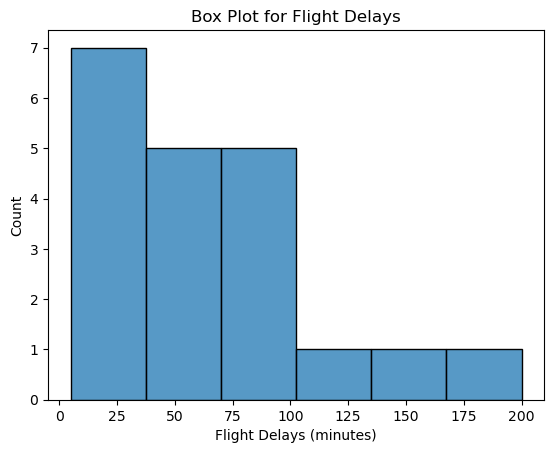

In [50]:
# 1. Answer
# Import necessary libraries
import numpy as np
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50,
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]

Q=np.percentile(delays,[10, 25, 50, 75, 90])
print("Percentiles (10th, 25th, 50th, 75th, 90th):",Q)
IQR=Q[3]-Q[1]
lower_bound = Q[1] - 1.5 * IQR
upper_bound = Q[3] + 1.5 * IQR
outliers = [x for x in delays if x < lower_bound or x > upper_bound]
print("IQR:", IQR)
print("Outliers:", outliers if outliers else "No outliers detected.")

# Plot Boxplot
sns.boxplot(x=delays)
plt.xlabel('Flight Delays (minutes)')
plt.title('Box Plot for Flight Delays')
plt.show()

## Question 2

In [ ]:
Question 2 :
A company wants to analyze the salary distribution of its employees to understand the 
central tendency and determine whether the data is skewed.
DataSet:
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]
Expected Output:
Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


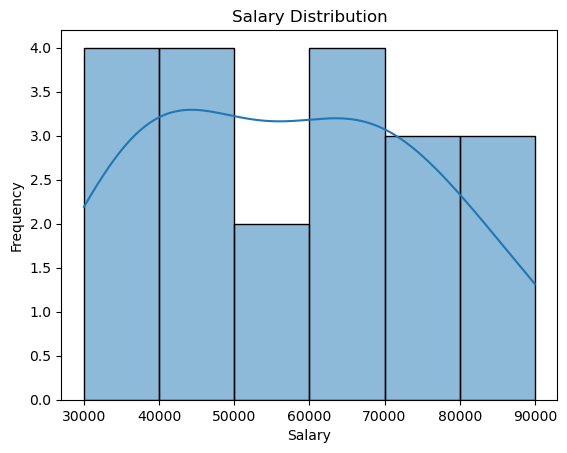

In [18]:
# Sample salary data
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]

# Calculate Mean, Median, and Mode
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)
mode_salary = stats.mode(salaries, keepdims=True).mode[0]

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)

# Skewness Check
if mean_salary > median_salary:
    print("The data is Right Skewed (Positive Skew)")
elif mean_salary < median_salary:
    print("The data is Left Skewed (Negative Skew)")
else:
    print("The data is Symmetrical")

sns.histplot(salaries, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

## Question 3

In [ ]:
Question 3:
 A school wants to analyze the exam performance of students across three subjects: 
Mathematics, Science, and English. How can Data Science concepts be applied to understand their performance?
DataSet:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}
Expected Output:
Descriptive Statistics
Histogram(graph)
Correlation Analysis(graph)
HeatMap(graph)


Missing Values:
 Student        0
Mathematics    0
Science        0
English        0
dtype: int64

Descriptive Statistics:
        Mathematics    Science    English
count    10.000000  10.000000  10.000000
mean     81.400000  79.400000  75.700000
std      10.844353  10.895463  11.086027
min      60.000000  55.000000  50.000000
25%      76.500000  75.750000  72.500000
50%      82.500000  81.000000  77.500000
75%      89.500000  87.250000  82.250000
max      95.000000  92.000000  90.000000


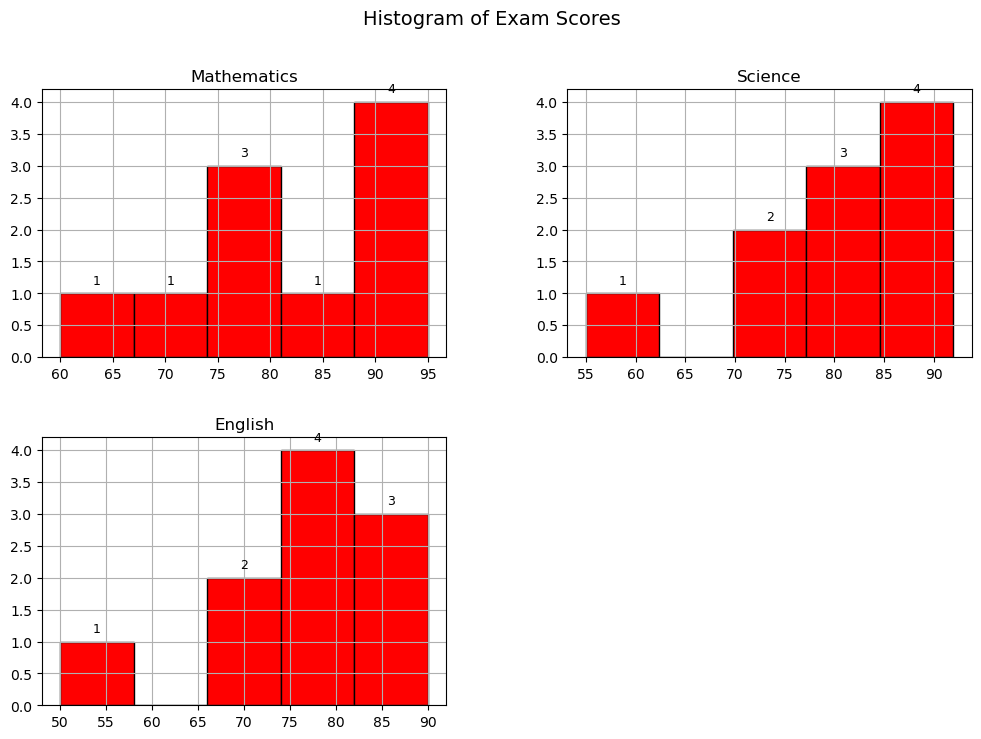


Correlation Matrix:
              Mathematics   Science   English
Mathematics     1.000000  0.792185  0.974318
Science         0.792185  1.000000  0.874999
English         0.974318  0.874999  1.000000


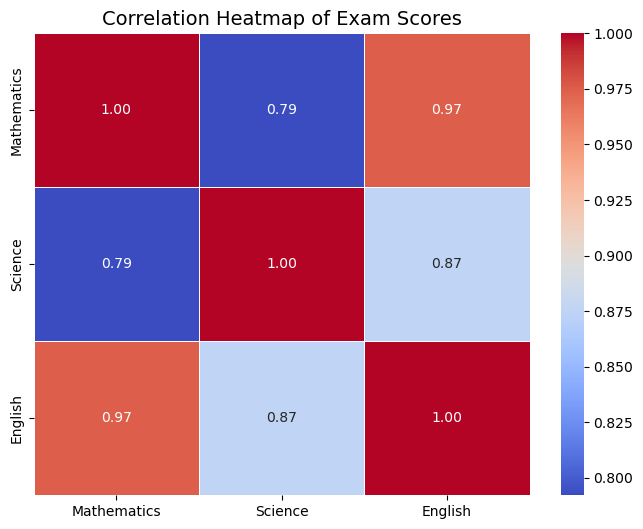

In [32]:
# Answer 3
# Sample data - Exam scores for 10 students
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}

# Create DataFrame
df = pd.DataFrame(data)
df

# Plot histograms for each subject
axes = df[['Mathematics', 'Science', 'English']].hist(
    bins=5, figsize=(12, 8), color='red', edgecolor='black'
)

# Data Preprocessing (Check for missing values)
print("Missing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Plot histograms for each subject
axes = df[['Mathematics', 'Science', 'English']].hist(
    bins=5, figsize=(12, 8), color='red', edgecolor='black'
)

# Add count labels
for ax in axes.flatten():
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                height + 0.1,
                int(height),
                ha='center',
                va='bottom',
                fontsize=9,
                color='black'
            )

plt.suptitle('Histogram of Exam Scores', fontsize=14)
plt.show()

# Correlation Analysis
correlation_matrix = df[['Mathematics', 'Science', 'English']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualization - Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Exam Scores', fontsize=14)
plt.show()

## Question 4

In [ ]:
Question 4:
A pharmaceutical company conducted a clinical trial with two groups: 
one receiving medication and the other a placebo. How do you perform a 
hypothesis test to determine the effectiveness of the medication?
Dataset:
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]
Expected Output:
T-Statistic: -9.201427649220966
P-Value: 3.163912817600812e-08
Reject the null hypothesis: The medication is effective.


In [37]:
# Answer 4:
# Simulated blood sugar levels after treatment
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]

t_stat, p_value=stats.ttest_ind(medication_group, placebo_group)
print(f"T-Statistic: {t_stat} \nP-Value: {p_value}\n")
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: The medication is effective.")
else:
    print("Accept the null hypothesis:  No significant effect of the medication.")


T-Statistic: -9.201427649220966 
P-Value: 3.163912817600812e-08

Reject the null hypothesis: The medication is effective.


## Question 5

In [ ]:
Question 5 : A company conducted a customer satisfaction survey where 
customers rated their experience on a scale of 1 to 10. Analyze the survey
results to calculate descriptive statistics and visualize the distribution of 
customer satisfaction ratings.
Sample DataSet:  
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]
Expected Output:
Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.746424919657298

Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.7464


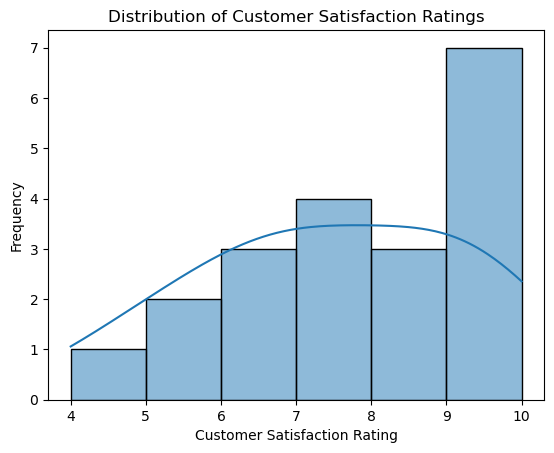

In [49]:
# Answer 5 :
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8,
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]

mean=np.mean(ratings)
median=np.median(ratings)
mode=stats.mode(ratings)[0]
std=np.std(ratings)
print(f"Mean Rating: {mean}")
print(f"Median Rating: {median}")
print(f"Mode Rating: {mode}")
print(f"Standard Deviation: {std:.4f}")

# Visualizing the distribution using Histogram
sns.histplot(ratings, kde=True)
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()